# KMeans Model

19:56:58 - src.utils.logger - INFO - 
Loading data

19:56:58 - src.utils.logger - INFO - Data loaded: glass
INFO:src.utils.logger:Data loaded: glass
19:56:58 - src.utils.logger - INFO - Running KMeans on glass dataset
INFO:src.utils.logger:Running KMeans on glass dataset
19:56:58 - src.utils.logger - INFO - 
Tuning hyperparameters

INFO:src.utils.logger:
Tuning hyperparameters

19:56:58 - src.utils.logger - INFO - 
Training model

INFO:src.utils.logger:
Training model

19:56:58 - src.utils.logger - INFO - Trained with: {'k': 9}
INFO:src.utils.logger:Trained with: {'k': 9}
19:56:58 - src.utils.logger - INFO - 
Evaluating the model

INFO:src.utils.logger:
Evaluating the model

19:56:58 - src.utils.logger - INFO - Scores: {'k': 9, 'n_out_clusters': 9, 'n_in_classes': 6, 'adjusted_rand_score': 0.21216491604188617, 'v_measure_score': 0.3719215664607797, 'homogeneity_score': 0.43101355082926335, 'completeness_score': 0.3270790135548328, 'silhouette_score': 0.43129656828491525, 'calinski_hara

[{'k': 2}, {'k': 3}, {'k': 4}, {'k': 5}, {'k': 6}, {'k': 7}, {'k': 8}, {'k': 9}]
{'k': 2}
{'k': 3}
{'k': 4}
{'k': 5}
{'k': 6}
{'k': 7}
{'k': 8}
{'k': 9}
['adjusted_rand_score', 'v_measure_score', 'silhouette_score', 'calinski_harabasz_score']


19:56:58 - src.utils.logger - INFO - Results written in report/glass/KMeans/k_9/23-10-2023_19h-56m-58s
INFO:src.utils.logger:Results written in report/glass/KMeans/k_9/23-10-2023_19h-56m-58s
19:56:58 - src.utils.logger - INFO - 
Done!

INFO:src.utils.logger:
Done!



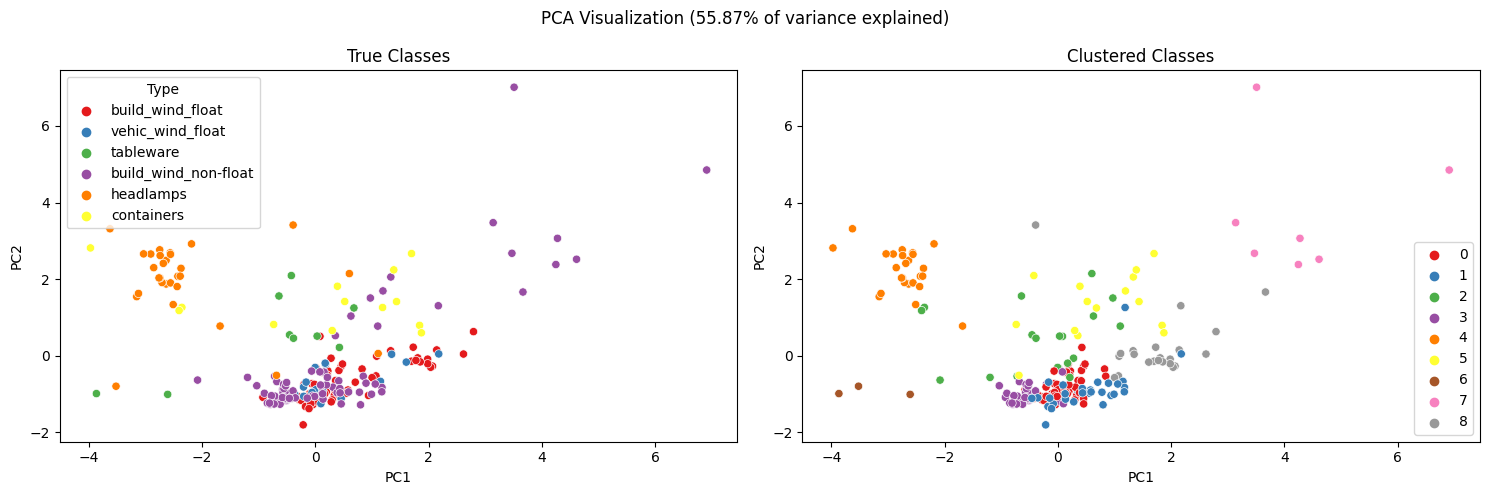

In [1]:
import pandas as pd
from src.trainflow.TrainFlow import TrainFlow
from src.clustering.KMeans import KMeans
from matplotlib import pyplot as plt

ds_name = "glass"
model = KMeans
target = "Type"
ls_metrics = ['adjusted_rand_score', 'v_measure_score', 
                'silhouette_score', 'calinski_harabasz_score']
output_path = 'report'
d_labels = {0: 'build_wind_float',
            1: 'vehic_wind_float',
            2: 'tableware',
            3: 'build_wind_non-float',
            4: 'headlamps',
            5: 'containers'
            }

tf = TrainFlow(ds_name, model, target=target, metrics=ls_metrics, 
               d_plot_params=d_labels, output_path=output_path)
tf.run()

(<Figure size 1500x500 with 2 Axes>,
 array([<AxesSubplot:title={'center':'True Classes'}, xlabel='PC1', ylabel='PC2'>,
        <AxesSubplot:title={'center':'Clustered Classes'}, xlabel='PC1', ylabel='PC2'>],
       dtype=object))

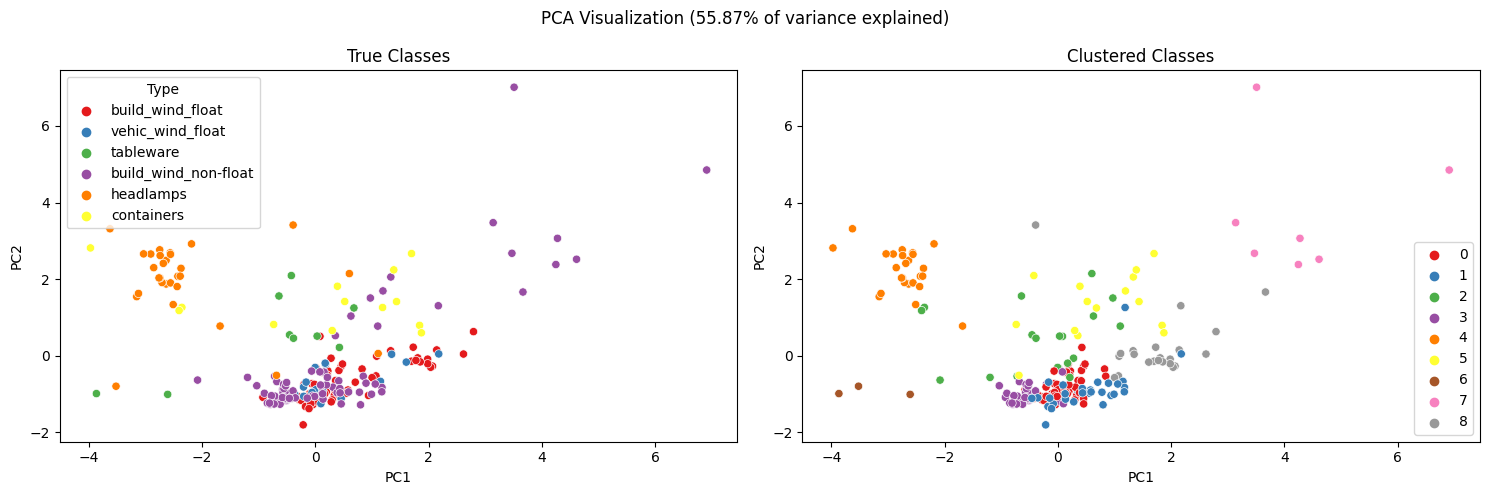

In [2]:

tf.evaluator.plot_scatter_pca_visualization(tf.trained_model.labels_, 
                                            d_classes = d_labels)

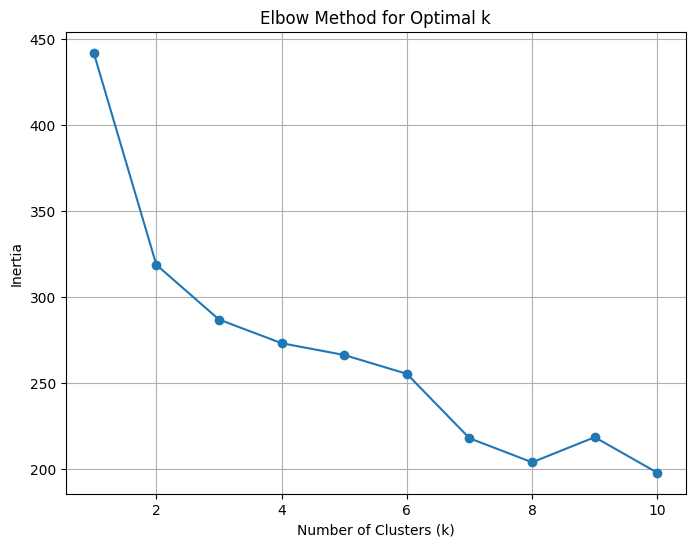

In [3]:
# Elbow method to find the optimal number of clusters (k)
inertia = tf.trained_model.inertia_

# Values of k to try
k_values = range(1, 11)

# List to store the inertias
inertias = []

from src.read.processing import Processing
dataclass = Processing(source_path='input/datasets/')
df = dataclass.read('glass')
df = df.iloc[:, :-1]

# Run k-means for different values of k
for k in k_values:
    model = KMeans(k=k, random_state=0)
    model.fit(df)  # Where X is your dataset
    inertias.append(model.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

plt.savefig(f'{tf.output_path_total}/img/glass_elbow_method.png')

plt.show()


In [4]:
tf.df_results

,k,n_out_clusters,n_in_classes,adjusted_rand_score,v_measure_score,homogeneity_score,completeness_score,silhouette_score,calinski_harabasz_score
7,9,9,6,0.212165,0.371922,0.431014,0.327079,0.431297,91.300455
6,8,8,6,0.208450,0.346018,0.397032,0.306620,0.454938,102.529936
3,5,5,6,0.208391,0.349206,0.312770,0.395250,0.354646,77.142199
5,7,7,6,0.194674,0.341757,0.363371,0.322570,0.487523,117.273085
4,6,6,6,0.189716,0.362619,0.362400,0.362837,0.496479,114.229122
2,4,4,6,0.011634,0.156705,0.138284,0.180787,0.258540,57.199824
0,2,2,6,0.011462,0.031244,0.020948,0.061446,0.337523,52.873109
1,3,3,6,-0.020907,0.053559,0.043290,0.070213,0.234367,51.968799


In [5]:
tf.df_results.head()

,k,n_out_clusters,n_in_classes,adjusted_rand_score,v_measure_score,homogeneity_score,completeness_score,silhouette_score,calinski_harabasz_score
7,9,9,6,0.212165,0.371922,0.431014,0.327079,0.431297,91.300455
6,8,8,6,0.208450,0.346018,0.397032,0.306620,0.454938,102.529936
3,5,5,6,0.208391,0.349206,0.312770,0.395250,0.354646,77.142199
5,7,7,6,0.194674,0.341757,0.363371,0.322570,0.487523,117.273085
4,6,6,6,0.189716,0.362619,0.362400,0.362837,0.496479,114.229122


In [6]:
import matplotlib.pyplot as plt

19:56:59 - src.utils.logger - INFO - 
Loading data

19:56:59 - src.utils.logger - INFO - 
Loading data

INFO:src.utils.logger:
Loading data

19:56:59 - src.utils.logger - INFO - Data loaded: glass
19:56:59 - src.utils.logger - INFO - Data loaded: glass
INFO:src.utils.logger:Data loaded: glass
19:56:59 - src.utils.logger - INFO - Running KMeans on glass dataset
19:56:59 - src.utils.logger - INFO - Running KMeans on glass dataset
INFO:src.utils.logger:Running KMeans on glass dataset
19:56:59 - src.utils.logger - INFO - 
Training model

19:56:59 - src.utils.logger - INFO - 
Training model

INFO:src.utils.logger:
Training model

19:56:59 - src.utils.logger - INFO - Trained with: {'k': 6}
19:56:59 - src.utils.logger - INFO - Trained with: {'k': 6}
INFO:src.utils.logger:Trained with: {'k': 6}
19:56:59 - src.utils.logger - INFO - 
Evaluating the model

19:56:59 - src.utils.logger - INFO - 
Evaluating the model

INFO:src.utils.logger:
Evaluating the model

19:56:59 - src.utils.logger - INFO - 

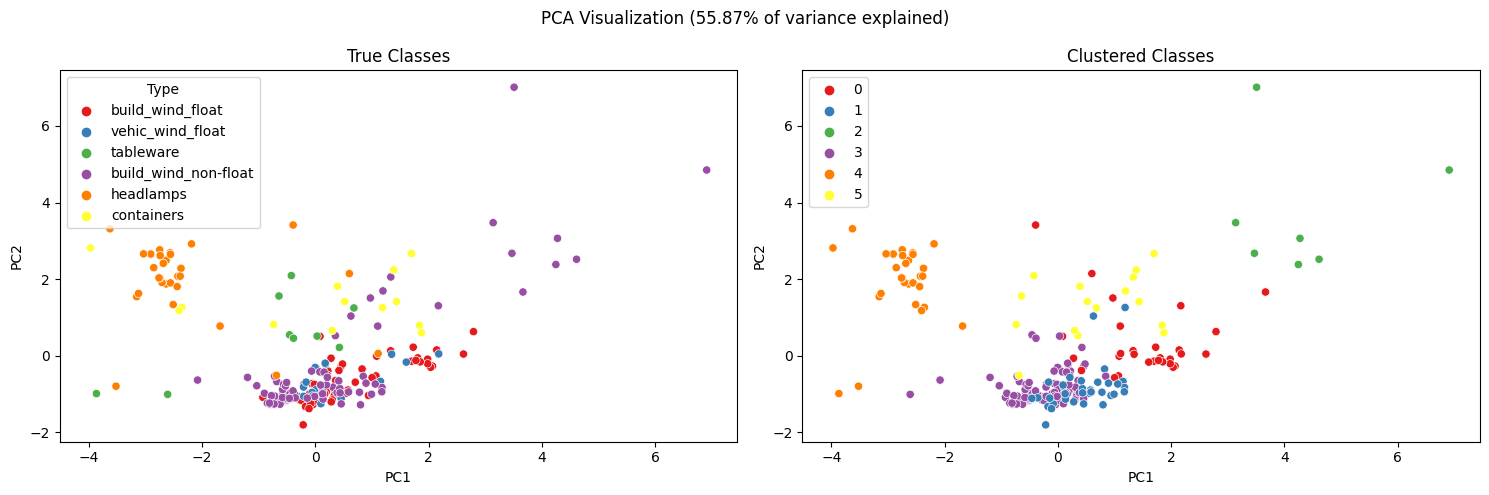

In [7]:
d_hyper = {'k': 6}

new_model = KMeans

tf_bp = TrainFlow(ds_name, new_model, hyperparams=d_hyper, target=target, metrics=ls_metrics, 
               d_plot_params=d_labels, output_path=output_path)
tf_bp.run()